# Import and Setting

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import warnings
import pandas as pd
import numpy as np
import random

from textblob import TextBlob
import operator
import itertools
import gzip
import json

import matplotlib.pyplot as plt
import seaborn as sns

SEED = 2004
warnings.filterwarnings("ignore")
np.set_printoptions(precision=5)
random.seed(SEED)

DIR = '/content/drive/My Drive/dtsa5799_product_review_topic_model'
DATA_DIR = f'{DIR}/data'
META_PATH = f'{DATA_DIR}/meta_Clothing_Shoes_and_Jewelry.jsonl.gz'
REVIEW_PATH = f'{DATA_DIR}/reviews_Clothing_Shoes_and_Jewelry.json.gz'

# Data

In [ ]:
# product data
with gzip.open(META_PATH, 'rt') as f:
    line = f.readline()
    data = json.loads(line)
    print(json.dumps(data, indent=4))

{
    "asin": "0000037214",
    "related": {
        "also_viewed": [
            "B00JO8II76",
            "B00DGN4R1Q",
            "B00E1YRI4C"
        ]
    },
    "title": "Purple Sequin Tiny Dancer Tutu Ballet Dance Fairy Princess Costume Accessory",
    "price": 6.99,
    "salesRank": {
        "Clothing": 1233557
    },
    "imUrl": "http://ecx.images-amazon.com/images/I/31mCncNuAZL.jpg",
    "brand": "Big Dreams",
    "categories": [
        [
            "Clothing, Shoes & Jewelry",
            "Girls"
        ],
        [
            "Clothing, Shoes & Jewelry",
            "Novelty, Costumes & More",
            "Costumes & Accessories",
            "More Accessories",
            "Kids & Baby"
        ]
    ]
}


In [ ]:
# review data
with gzip.open(REVIEW_PATH, 'rt') as f:
    line = f.readline()
    data = json.loads(line)
    print(json.dumps(data, indent=4))

{
    "reviewerID": "A2XVJBSRI3SWDI",
    "asin": "0000031887",
    "reviewerName": "abigail",
    "helpful": [
        0,
        0
    ],
    "reviewText": "Perfect red tutu for the price. I baught it as part of my daughters Halloween costume and it looked great on her.",
    "overall": 5.0,
    "summary": "Nice tutu",
    "unixReviewTime": 1383523200,
    "reviewTime": "11 4, 2013"
}


### 'nike' asins and sales_ranks list

get the dictionary for nike products and their sales_rank

In [ ]:
sales_ranks = {}

with gzip.open(META_PATH) as products:
    for product in products:
        data = json.loads(product)
        categories = [c.lower() for c in
                      list(itertools.chain(*data.get("categories", [])))]
        if "nike" in categories:
            if data.get('salesRank'):
              asin = data.get('asin', None)
              if asin:
                rank = list(data['salesRank'].values())[0]
                sales_ranks[data['asin']] = rank

print(f'{len(sales_ranks)} asins: sales_ranks for nike products has been collected.')
print(f'dic example: {list(sales_ranks.items())[:3]}')

7962 asins: sales_ranks for nike products has been collected.
dic example: [('B0000V9K32', 67039), ('B0000V9K3W', 102054), ('B0000V9K46', 116131)]


### best sale asins

In [ ]:
ordered_asin_ranks = sorted(sales_ranks.items(), key=operator.itemgetter(1))
ordered_asin_ranks[:10]

[('B00EQBFL62', 179),
 ('B00EQBEWMQ', 179),
 ('B00EQBEUXC', 179),
 ('B00EQBGOTA', 179),
 ('B006RBH2PW', 188),
 ('B00AMTY3UC', 209),
 ('B00D8M3Q3U', 272),
 ('B00527DJAY', 318),
 ('B00527DIXW', 318),
 ('B00BUDLR1C', 337)]

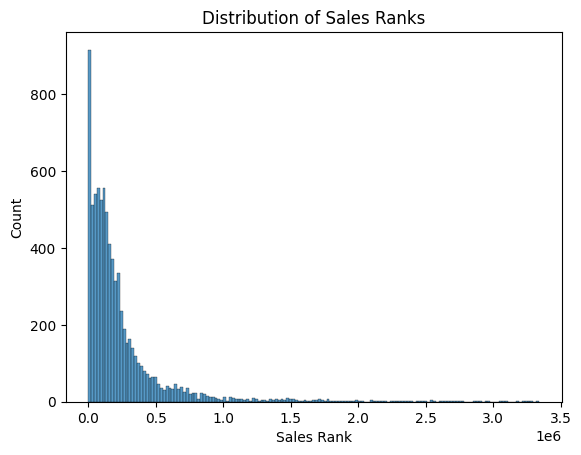

In [ ]:
# inspect the product rank vs. it's count
plot = sns.histplot(list(sales_ranks.values()))
plt.xlabel('Sales Rank')
plt.title('Distribution of Sales Ranks');

In [ ]:
# select the asins by filtering sales_rank < 100000
# get the list of best_asins
best_asins_set = {asin for asin, rank in sales_ranks.items() if rank < 1e5}
best_asins = list(best_asins_set)
print(f'{len(best_asins)} best sale Asins')
print(f'best Asins example: {best_asins[:3]}')

2875 best sale Asins
best Asins example: ['B00D987BJ8', 'B00D8GOT1Y', 'B00JVSOTS6']


In [ ]:
# save list best_asins as bestnikeasins.txt
with open('%s/bestnikeasins.txt' % DATA_DIR, 'w') as f:
    f.write(','.join(best_asins))

### all reviews for best sale nike products

In [ ]:
# get the reviews from the list of best_asins
top_texts = {}

with gzip.open(REVIEW_PATH) as reviews:
    for review in reviews:
        data = json.loads(review)
        if data["asin"] in best_asins:
            re_id = data.get('reviewerID', "")
            id = f"{data['asin']}.{data['reviewerID']}"
            text = data.get("reviewText", "").strip()
            if text:
                top_texts[id] = text

print(f'{len(top_texts)} reviews for nike products has been collected.')

13380 reviews for nike products has been collected.


### sentiments

In [ ]:
for i, (id, text) in enumerate(list(top_texts.items())[30:35]):
    print(i, id, text[:100])
    if TextBlob(text).sentiment.polarity < 0.0:
      print('This text is negative.')
    elif TextBlob(text).sentiment.polarity > 0.0:
      print('This text is positive.')
    else:
      print('This text is neural.')
    print('----------------------------')

0 B0001YMVVG.A2DSHG06KR889 I used to have the same watch before but I lost it , so I ordered it through Amazon as I like it so 
This text is positive.
----------------------------
1 B0001YMVVG.AL1LOR30J0T85 The watch is great! Came in a few days and was in brand new condition, as expected.
This text is positive.
----------------------------
2 B0001YMVVG.AC7VTHM5OYZI6 This watch is sporty, lightweight, easy to take on and off.  I'm a nurse and wash my hands often so 
This text is positive.
----------------------------
3 B0001YMVVG.A1PWHZ59G8XRJD Watch was very small and barely fit my 6 year-old daughter's wrist.  And she has a small frame!  Str
This text is negative.
----------------------------
4 B0001YMVVQ.A3M4BEKZEN439P I enjoy the convenience of this watch! It is very easy to slip on and off and the glo feature is ver
This text is positive.
----------------------------


In [ ]:
# save dict top_texts as top_reviewstext.jsonl
with open('%s/top_reviewstext.jsonl' % DATA_DIR, 'w') as top_reviewtext:
    for id, text in top_texts.items():
        data = {str(id): text}
        data_json = json.dumps(data)
        top_reviewtext.write(f'{data_json}\n')